Below is a simple program for a trading strategy in which we can long one share of stock when the moving average of 10 days is larger than the moving average of 50 days

## 1. importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
import csv
import seaborn as sns

# 2. importing dataset of Reliance Ind. stock prices from
## 01-Jan-2010 to 27-July-2021

In [12]:
#read csv file to get population and density values of all cities and countines 
reliance = pd.read_csv(r'C:\Users\PSharan\Downloads\RELIANCE.NS.csv')
reliance.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,540.427307,540.427307,506.127411,532.700500,484.266144,35372156.0
1,2010-01-05,569.551208,569.551208,527.697937,530.323059,482.104797,9872785.0
2,2010-01-06,534.879883,542.111328,530.298279,538.891846,489.894440,10933743.0
3,2010-01-07,538.891846,552.265076,533.938782,547.832092,498.021881,12090336.0
4,2010-01-08,548.797974,551.670715,542.854309,546.395691,496.716003,6973331.0


# 3.Creating relative dataframe

In [13]:
# adding  two columns - MA10 and MA50
reliance['MA10'] = reliance['Close'].rolling(10).mean()   #mocing average for 10 days
reliance['MA50'] = reliance['Close'].rolling(50).mean()   #moving average for 50 days

#reliance = reliance.dropna()  #drop any column to remove any "not a number" data
reliance.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
2855,2021-07-20,2099.500000,2108.000000,2084.000000,2093.800049,2093.800049,3111185.0,2093.115015,2108.841999
2856,2021-07-22,2119.000000,2123.899902,2098.149902,2120.699951,2120.699951,3679260.0,2094.180005,2112.592998
2857,2021-07-23,2134.449951,2134.449951,2102.050049,2105.699951,2105.699951,4585938.0,2095.489990,2116.443997
2858,2021-07-26,2108.000000,2121.000000,2071.100098,2076.850098,2076.850098,5717830.0,2096.055005,2119.234998
2859,2021-07-27,2076.800049,2083.699951,2042.000000,2055.000000,2055.000000,4995516.0,2093.144995,2121.127998


## 4. creating a column "Shares" to indicate when to long one share of a stock 

In [15]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

reliance['Shares'] = [1 if reliance.loc[ei, 'MA10']>reliance.loc[ei, 'MA50'] else 0 for ei in reliance.index]
reliance.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares
2855,2021-07-20,2099.500000,2108.000000,2084.000000,2093.800049,2093.800049,3111185.0,2093.115015,2108.841999,0
2856,2021-07-22,2119.000000,2123.899902,2098.149902,2120.699951,2120.699951,3679260.0,2094.180005,2112.592998,0
2857,2021-07-23,2134.449951,2134.449951,2102.050049,2105.699951,2105.699951,4585938.0,2095.489990,2116.443997,0
2858,2021-07-26,2108.000000,2121.000000,2071.100098,2076.850098,2076.850098,5717830.0,2096.055005,2119.234998,0
2859,2021-07-27,2076.800049,2083.699951,2042.000000,2055.000000,2055.000000,4995516.0,2093.144995,2121.127998,0


# 5.Calculating the profit made in this strategy

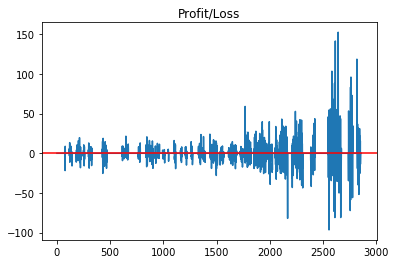

In [31]:
#Add a new column "Profit" using List Comprehension, for all rows , if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss

reliance['Close1'] = reliance['Close'].shift(1)
reliance['Profit'] = [reliance.loc[ei, 'Close'] - reliance.loc[ei, 'Close1'] if reliance.loc[ei, 'Shares']==1 else 0 for ei in reliance.index]
reliance['Profit'].plot()
plt.title("Profit/Loss")
plt.axhline(y=0, color='red')

In [17]:
#Use .cumsum() to calculate the accumulated wealth over the period
reliance['wealth'] = reliance['Profit'].cumsum()
reliance.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
2855,2021-07-20,2099.500000,2108.000000,2084.000000,2093.800049,2093.800049,3111185.0,2093.115015,2108.841999,0,2098.949951,0.0,1081.075772
2856,2021-07-22,2119.000000,2123.899902,2098.149902,2120.699951,2120.699951,3679260.0,2094.180005,2112.592998,0,2093.800049,0.0,1081.075772
2857,2021-07-23,2134.449951,2134.449951,2102.050049,2105.699951,2105.699951,4585938.0,2095.489990,2116.443997,0,2120.699951,0.0,1081.075772
2858,2021-07-26,2108.000000,2121.000000,2071.100098,2076.850098,2076.850098,5717830.0,2096.055005,2119.234998,0,2105.699951,0.0,1081.075772
2859,2021-07-27,2076.800049,2083.699951,2042.000000,2055.000000,2055.000000,4995516.0,2093.144995,2121.127998,0,2076.850098,0.0,1081.075772


In [27]:
print("The total profit made is Rs. {} in  11.5 years" .format(round(reliance.iloc[-1,12],2)))

The total profit made is Rs. 1081.08 in  11.5 years


Text(0.5, 1.0, 'Total money you win is 1081.08')

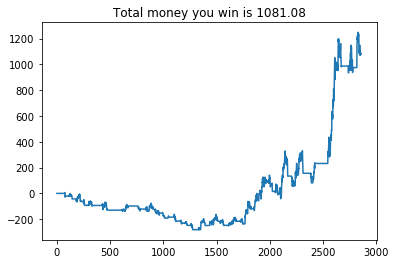

In [30]:
reliance['wealth'].plot()
plt.title('Total money you win is {}'.format(round(reliance.iloc[-1,12],2)))